In [1]:
%run visualize+imports.ipynb


1. age: age in years 
2. sex: sex (1 = male; 0 = female) 
3. cp: chest pain type <br>
     a. Value 1: typical angina <br>
    b. Value 2: atypical angina <br>
    c. Value 3: non-anginal pain <br>
    d. Value 4: asymptomatic  <br> 
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
5. chol: serum cholestoral in mg/dl 
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. restecg: resting electrocardiographic results <br>
    a. Value 0: normal <br>
    b. Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br>
    c. Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria <br>
8. thalach: maximum heart rate achieved  
9. exang: exercise induced angina (1 = yes; 0 = no) 
10. oldpeak = ST depression induced by exercise relative to rest 
11. slope: the slope of the peak exercise ST segment  <br>
    -- Value 1: upsloping <br>
    -- Value 2: flat <br>
    -- Value 3: downsloping <br>  
12. ca: number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. target: 1 disease. 0 no disease




In [2]:
path = ''

In [3]:
dataset = load_dataset('heart.csv')

In [4]:
dataset.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
print (*dataset.columns)
print (*dataset.isna().any()) 

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal target
False False False False False False False False False False False False False False


age 0 sex 96 cp 143 trestbps 0 chol 0 fbs 258 restecg 147 thalach 0 exang 204 oldpeak 99 slope 21 ca 175 thal 2 target 138 

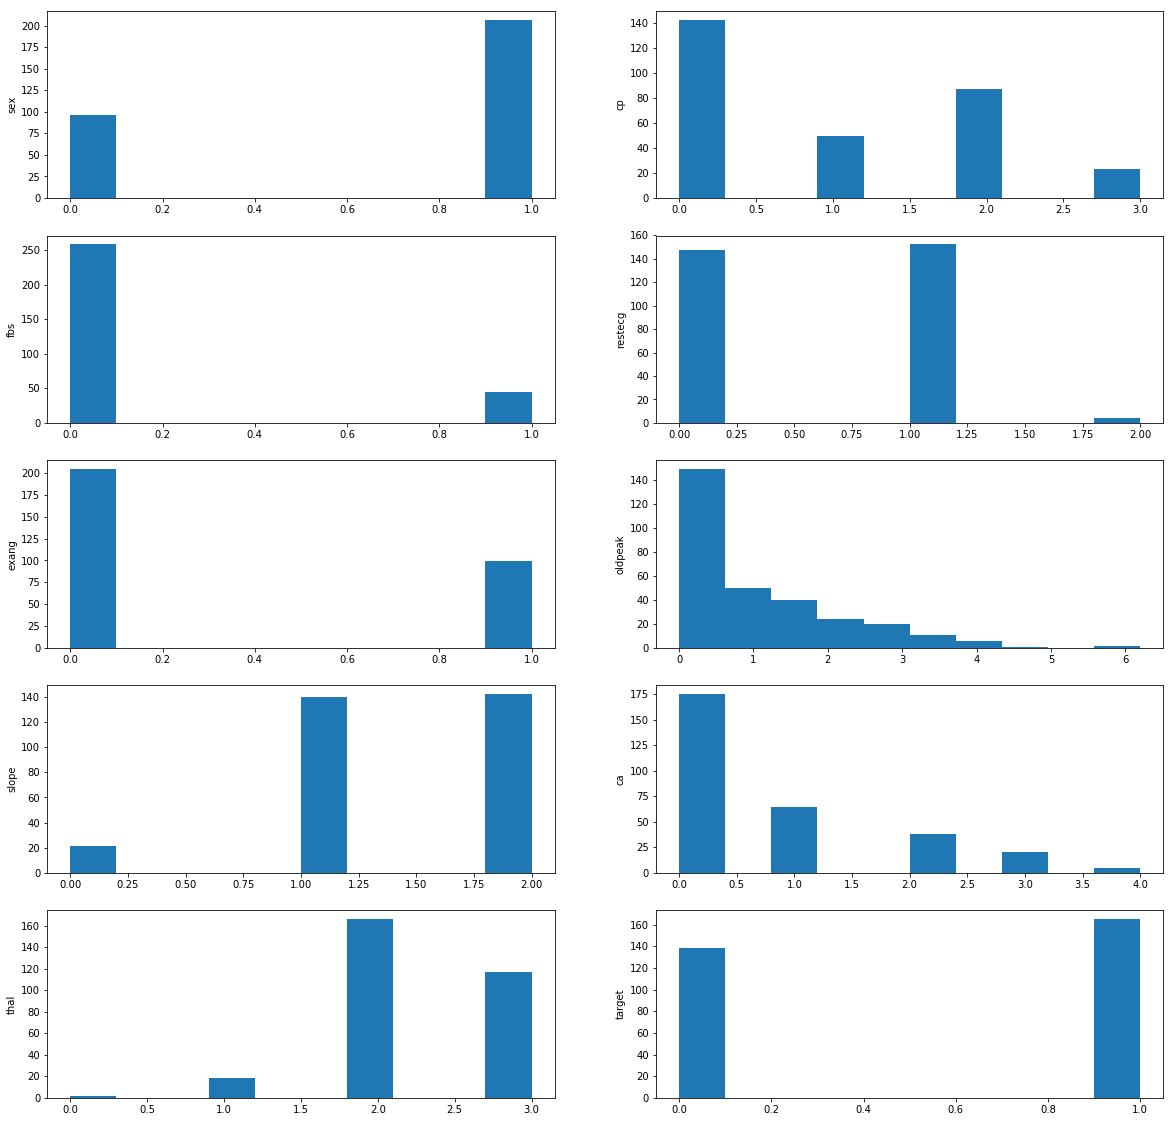

In [7]:
fig, ax = plt.subplots(5,2,figsize = (20,20))
ax = ax.ravel()
i = 0 
for column in dataset.columns: 
        print (column, sum(dataset[column] == 0), end = ' ')
        if sum(dataset[column] == 0) > 0: 
            ax[i].hist(dataset[column])
            ax[i].set_ylabel(column)
            
            i+=1
            

In [8]:
list_to_impute = ['trestbps', 'chol','slope',  'thal']
# according to the documentation 
# trestbps is the resting blood pressure so it should not be 0. 
# cholestrol also should not be 0 
#  slope 1,2,3 are valid values because 2 is flat. 0 slope doesn't mean anything. 
# thal should not be 0 because it has values 1,2,3 as valid values in 3 classes. 

In [9]:
imputer = Imputer(missing_values = 0, strategy = 'mean', axis = 0, verbose = 2)

In [10]:
imputer = imputer.fit(dataset[list_to_impute])
dataset[list_to_impute] = imputer.transform(dataset[list_to_impute])

In [11]:
dataset.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [12]:
dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.191138,0.276326,0.066047,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.002608,0.118261,0.210404,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.159611,-0.181053,-0.169183,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.058046,0.101389,0.059928,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.041044,0.070511,0.085342,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,0.006959,0.137979,-0.007530,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.097331,-0.072042,-0.014009,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.448519,-0.213177,-0.117741,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.281834,0.115739,0.227123,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.424494,0.222682,0.208719,-0.430696


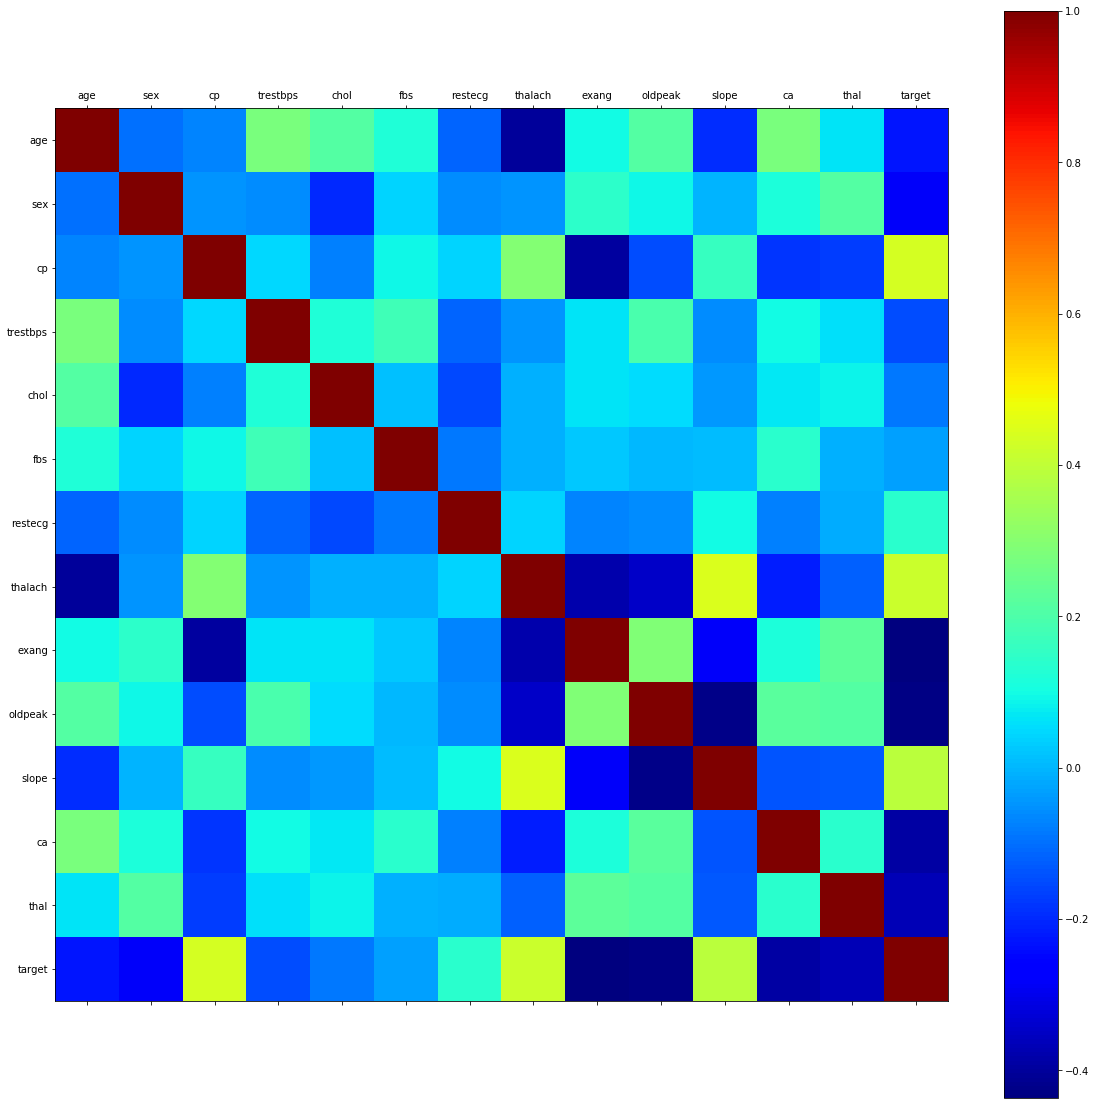

In [13]:
correl_draw(dataset)

fit_transform only the training data and transform for the test set!

In [14]:
# Create features and labels
features = dataset.drop(['target'], axis=1) 

labels = dataset['target']

features2 = dataset.drop(['target','thalach'],axis = 1) #thalach seems to be correlated to slope!

features3 = dataset.drop(['target', 'slope'], axis =1) # try by removing slope

features4 = dataset.drop(['target', 'oldpeak'],axis = 1) # try by removing oldpeak

list_features = [features,features2,features3,features4]

accuracy precision  recall     f1
feature 1
k= 3
0.87     0.93         0.81       0.87
k= 4
0.87     0.96         0.78       0.86
k= 7
0.90     0.93         0.88       0.90
k= 8
0.89     0.93         0.84       0.89
feature 2
k= 3
0.87     0.90         0.84       0.87
k= 4
0.82     0.89         0.75       0.81
k= 7
0.90     0.91         0.91       0.91
k= 8
0.87     0.90         0.84       0.87
feature 3
k= 3
0.89     0.93         0.84       0.89
k= 4
0.89     0.96         0.81       0.88
k= 7
0.87     0.88         0.88       0.88
k= 8
0.89     0.90         0.88       0.89
feature 4
k= 3
0.89     0.93         0.84       0.89
k= 4
0.87     0.93         0.81       0.87
k= 7
0.90     0.93         0.88       0.90
k= 8
0.89     0.93         0.84       0.89


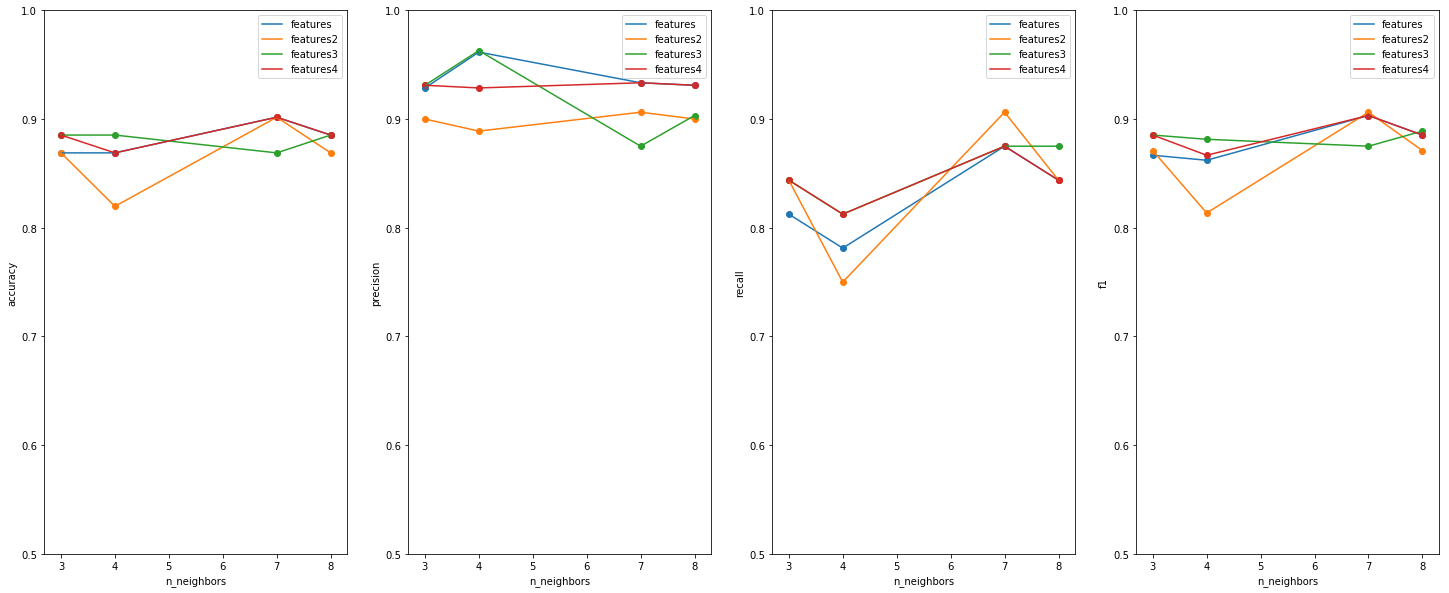

In [15]:
plot_metrics(list_features,labels, 0.20, [0.5,1.0]) #for knn!

Interpretation : Features3 which excludes slope from the dataset doesn't lead to much change of the accuracy and other measures. 
It does perform better in other cases and hence we can consider dropping the feature slope!

features 1
         accuracy  precision   recall     f1s 
linear :  0.913   |  0.917   |  0.917   |  0.917   
  rbf  :  0.848   |  0.870   |  0.833   |  0.851   
 poly  :  0.870   |  0.875   |  0.875   |  0.875   
features 2
         accuracy  precision   recall     f1s 
linear :  0.870   |  0.875   |  0.875   |  0.875   
  rbf  :  0.870   |  0.909   |  0.833   |  0.870   
 poly  :  0.848   |  0.840   |  0.875   |  0.857   
features 3
         accuracy  precision   recall     f1s 
linear :  0.913   |  0.917   |  0.917   |  0.917   
  rbf  :  0.804   |  0.857   |  0.750   |  0.800   
 poly  :  0.870   |  0.875   |  0.875   |  0.875   
features 4
         accuracy  precision   recall     f1s 
linear :  0.891   |  0.913   |  0.875   |  0.894   
  rbf  :  0.804   |  0.826   |  0.792   |  0.809   
 poly  :  0.848   |  0.870   |  0.833   |  0.851   


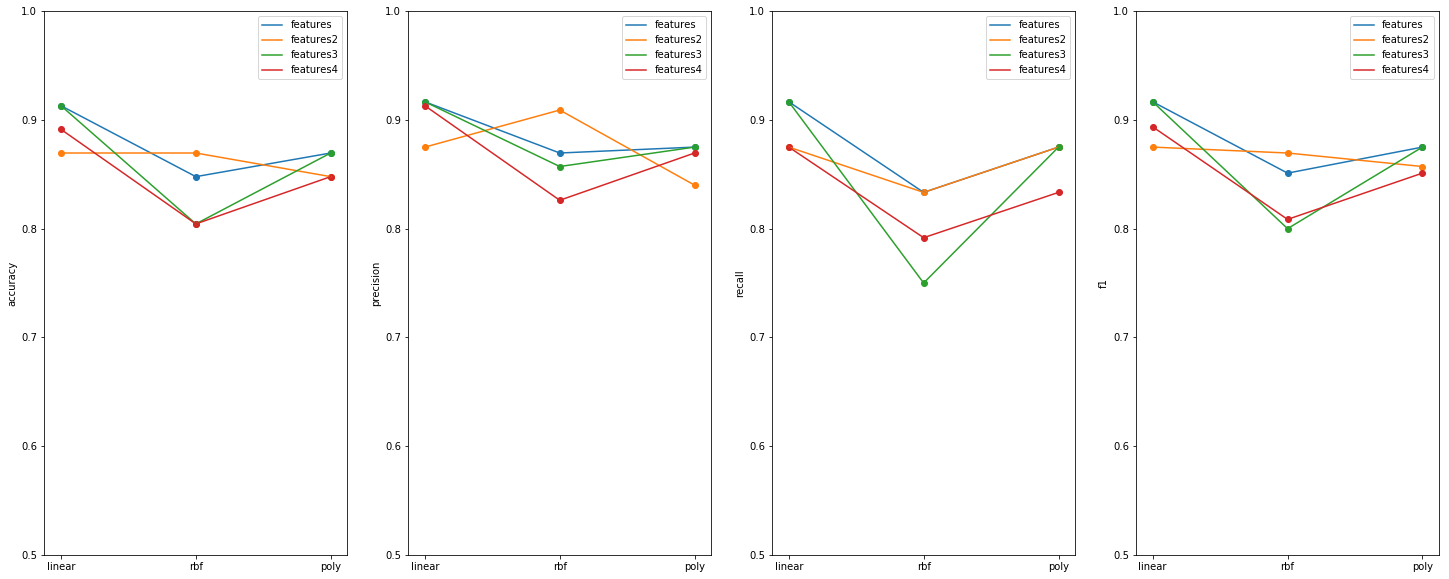

In [16]:
visualize_svm(list_features,labels,0.20, [0.5,1.0]) # test size 0.15, labels , ylimits for the plotting are passed as params!

Inference - Dropping the slope didn't make a difference to the accuracy, precision, recall or f1s for svm in linear kernel!

In [28]:
dataset = load_dataset('heart.csv')
dataset = shuffle(dataset,random_state = 22)
for col in list_to_impute: 
    for row in range(len(dataset[col])):
        if dataset.loc[row,col] == 0: 
            dataset.loc[row,col] = np.nan
            

In [29]:
dataset = dataset.interpolate(method = 'nearest').bfill()

In [30]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
111,57,1,2,150,126,1,1,173,0,0.2,2.0,1,3.0,1
56,48,1,0,122,222,0,0,186,0,0.0,2.0,0,2.0,1
302,57,0,1,130,236,0,0,174,0,0.0,1.0,1,2.0,0
255,45,1,0,142,309,0,0,147,1,0.0,1.0,3,3.0,0
41,48,1,1,130,245,0,0,180,0,0.2,1.0,0,2.0,1


In [31]:
dataset.head().isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [32]:
# Create features and labels
features = dataset.drop(['target'], axis=1) 

labels = dataset['target']

features2 = dataset.drop(['target','thalach'],axis = 1) #thalach seems to be correlated to slope!

features3 = dataset.drop(['target', 'slope'], axis =1) # try by removing slope

features4 = dataset.drop(['target', 'oldpeak'],axis = 1) # try by removing oldpeak

list_features = [features,features2,features3,features4]

accuracy precision  recall     f1
feature 1
k= 3
0.76     0.68         0.85       0.76
k= 4
0.74     0.70         0.70       0.70
k= 7
0.80     0.72         0.90       0.80
k= 8
0.76     0.71         0.75       0.73
feature 2
k= 3
0.83     0.77         0.85       0.81
k= 4
0.76     0.76         0.65       0.70
k= 7
0.83     0.77         0.85       0.81
k= 8
0.83     0.80         0.80       0.80
feature 3
k= 3
0.72     0.63         0.85       0.72
k= 4
0.76     0.71         0.75       0.73
k= 7
0.78     0.69         0.90       0.78
k= 8
0.76     0.70         0.80       0.74
feature 4
k= 3
0.76     0.70         0.80       0.74
k= 4
0.78     0.78         0.70       0.74
k= 7
0.78     0.71         0.85       0.77
k= 8
0.74     0.70         0.70       0.70


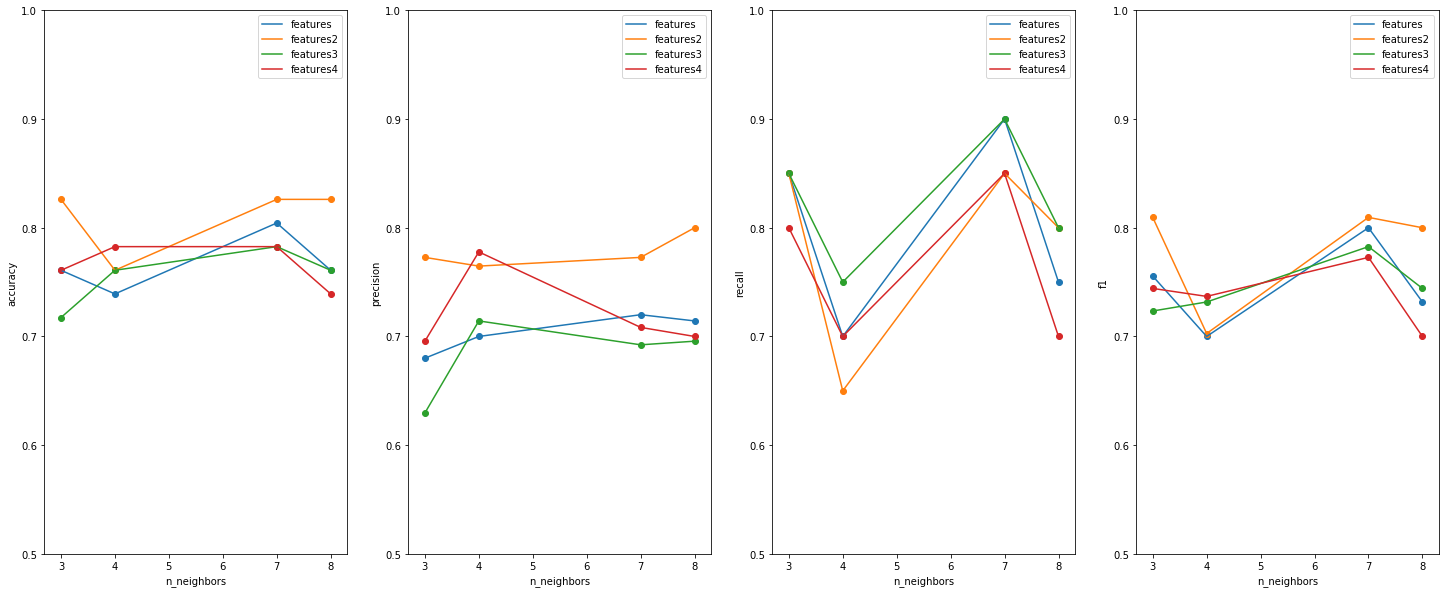

In [33]:
plot_metrics(list_features,labels, 0.15, [0.5,1.0]) #for knn!

features 1
         accuracy  precision   recall     f1s 
linear :  0.848   |  0.815   |  0.917   |  0.863   
  rbf  :  0.826   |  0.808   |  0.875   |  0.840   
 poly  :  0.761   |  0.724   |  0.875   |  0.792   
features 2
         accuracy  precision   recall     f1s 
linear :  0.870   |  0.846   |  0.917   |  0.880   
  rbf  :  0.783   |  0.792   |  0.792   |  0.792   
 poly  :  0.804   |  0.800   |  0.833   |  0.816   
features 3
         accuracy  precision   recall     f1s 
linear :  0.848   |  0.815   |  0.917   |  0.863   
  rbf  :  0.804   |  0.778   |  0.875   |  0.824   
 poly  :  0.826   |  0.767   |  0.958   |  0.852   
features 4
         accuracy  precision   recall     f1s 
linear :  0.848   |  0.840   |  0.875   |  0.857   
  rbf  :  0.783   |  0.769   |  0.833   |  0.800   
 poly  :  0.739   |  0.700   |  0.875   |  0.778   


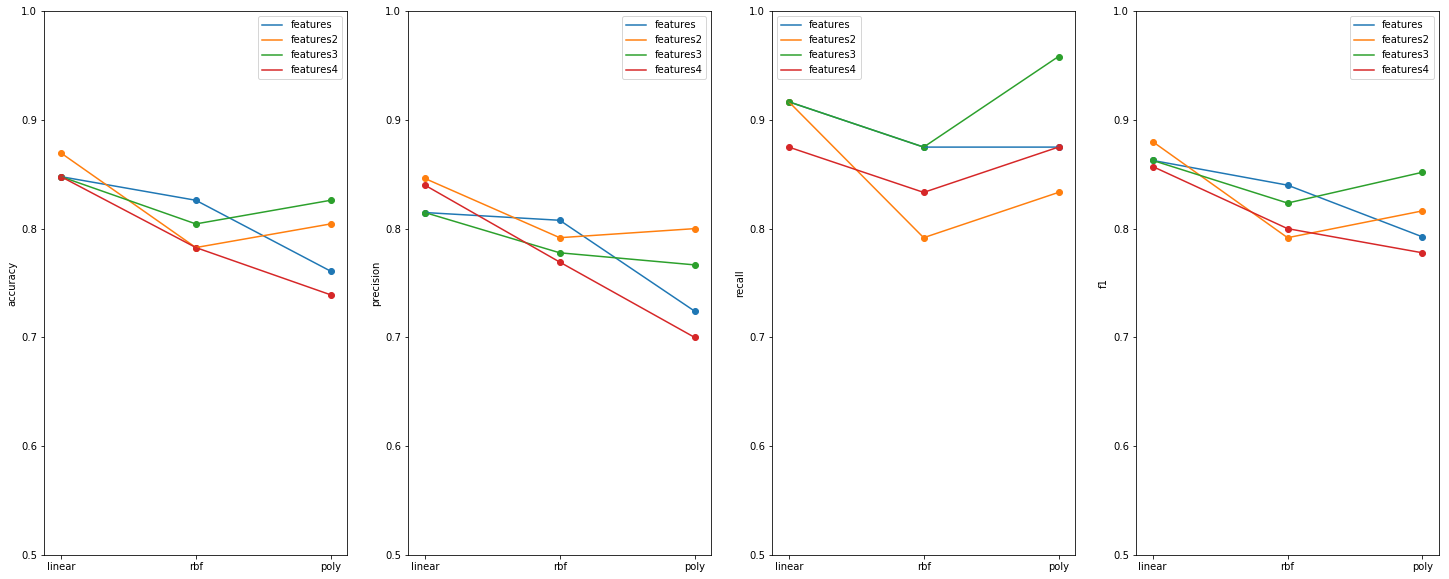

In [34]:
visualize_svm(list_features,labels,0.20, [0.5,1.0])